<h5 align = right> Felix Filipi- 2301877590</h5>

<hr>
<h1 align="center"><i>Assignment 2 - Image Filtering</i></h1>
<h1 align="center"><i>Computer Vision</i></h1>
<hr>

<h3> 1. Implement image low pass filtering with FFT using CV2 and Numpy (in python notebook please) as shown in the following figures (You may use your own images). 

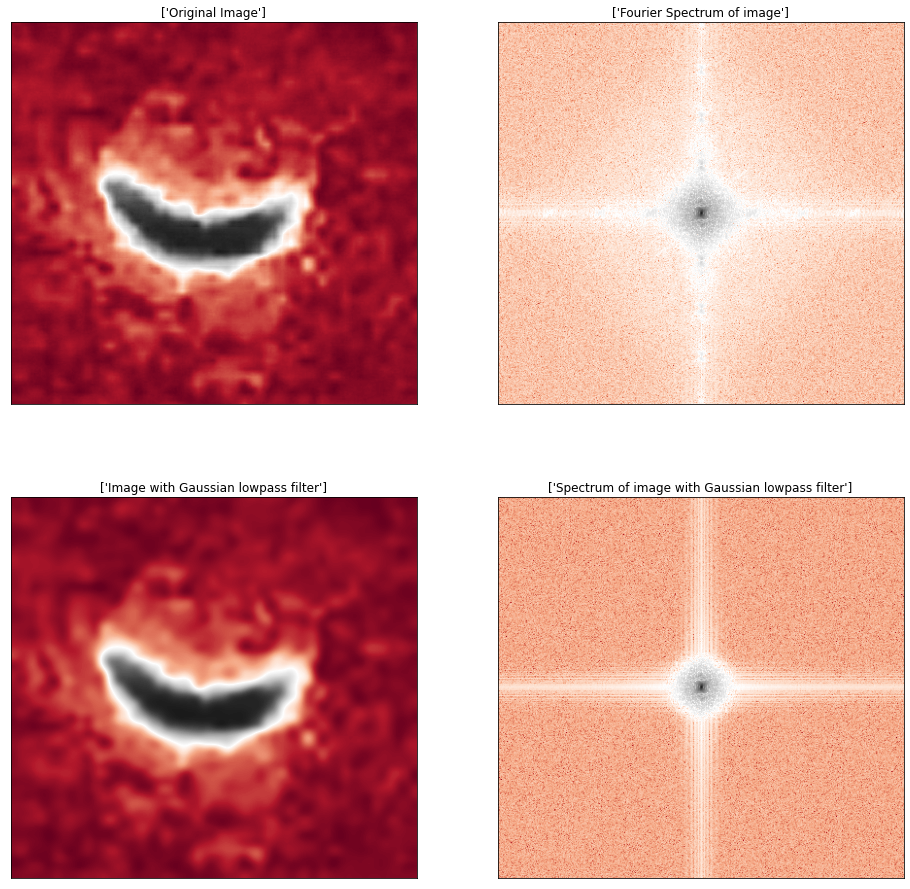

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('set.jpeg',0)

def dft(img, axes):
    dft = np.fft.fft2(img, axes=axes) # do fft as complex output
    dft_shift = np.fft.fftshift(dft) # apply shift of origin to the center of image
    mag = np.abs(dft_shift) # generate spectrum from magnitude image (usually for viewing only)
    spec = np.log(mag) / 20
    return spec

def gauss_blur(img,xy):
    blur_img = cv2.GaussianBlur(img, xy, cv2.BORDER_DEFAULT)
    return blur_img

spec = dft(img,(0,1))
gauss_img = gauss_blur(img,(11,11))
gauss_spec = dft(gauss_img,(0,1))

img_list = [img,spec,gauss_img, gauss_spec]
title = ['Original Image','Fourier Spectrum of image',
         'Image with Gaussian lowpass filter','Spectrum of image with Gaussian lowpass filter']

plt.figure(figsize = (16,16))
for i in range(len(img_list)):
    plt.subplot(2,2,i+1)
    plt.title([title[i]])
    plt.imshow(img_list[i],cmap="RdGy")
    plt.yticks([]),plt.xticks([])

<h3> 2. Similar like task #1, but now try to implement image high pass filtering.

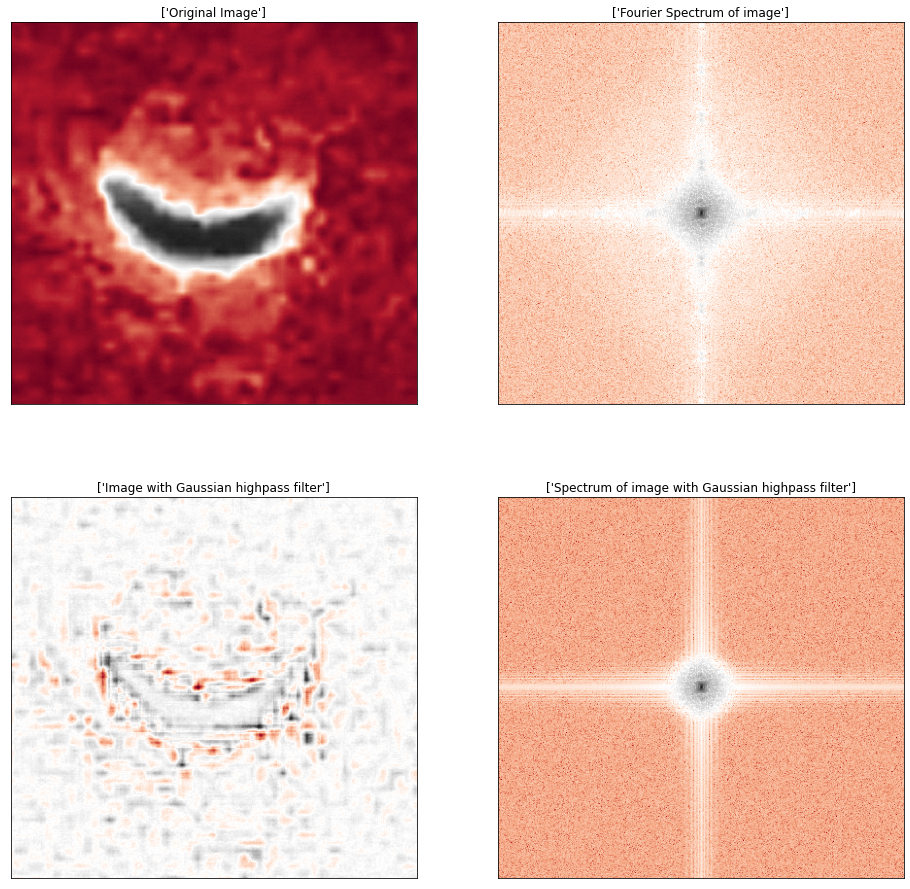

In [2]:
def new_gauss_blur(img,xy):
    blur_img = cv2.GaussianBlur(img, xy, cv2.BORDER_DEFAULT) + 127
    hp = img - blur_img
    return hp

gauss_img_2 = new_gauss_blur(img,(105,105))
gauss_spec_2 = dft(gauss_img,(0,1))

img_list = [img,spec,gauss_img_2, gauss_spec_2]
title = ['Original Image','Fourier Spectrum of image',
         'Image with Gaussian highpass filter','Spectrum of image with Gaussian highpass filter']

plt.figure(figsize = (16,16))
for i in range(len(img_list)):
    plt.subplot(2,2,i+1)
    plt.title([title[i]])
    plt.imshow(img_list[i],cmap="RdGy")
    plt.yticks([]),plt.xticks([])

<h3> 3. This time is somewhat difficult. You are asked to design Butterworth Notch Filter to remove repetitive noise in the input image

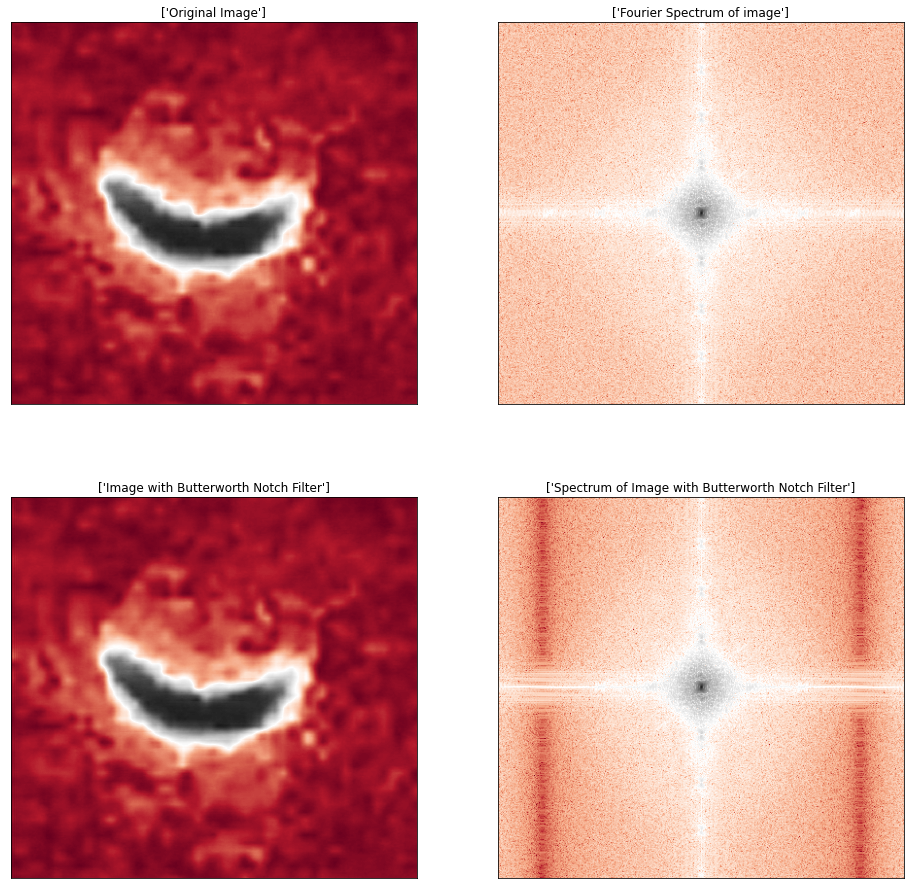

In [3]:
from scipy.signal import lfilter, iirnotch

x, y = iirnotch(100, Q=0.01, fs=255)
butter_notch = lfilter(x, y, img)
butter_notch_spec = dft(butter_notch,(0,1))

img_list = [img,spec,butter_notch,butter_notch_spec]
title = ['Original Image','Fourier Spectrum of image',
         'Image with Butterworth Notch Filter','Spectrum of Image with Butterworth Notch Filter']

plt.figure(figsize = (16,16))
for i in range(len(img_list)):
    plt.subplot(2,2,i+1)
    plt.title([title[i]])
    plt.imshow(img_list[i],cmap="RdGy")
    plt.yticks([]),plt.xticks([]) 